In [60]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [62]:
# afficher le dataset and dropping NaN values
df = pd.read_csv(r"C:\Users\nsrma\Downloads\songs_normalize.csv")
df = df.dropna(axis=1, how='all')
print(df.info)
df.head()

<bound method DataFrame.info of               artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceabil

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [64]:
#Choosing feeatures 
features = [
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo']

df_clustering = df[['song','artist','genre']+features].copy() # making a copy of our dataset that only contains the information we need to keep
df_clustering[features] = df_clustering[features].apply(pd.to_numeric, errors='coerce') #i did this to avoid dtype error when i groupby mean

print(df_clustering.head())

                     song          artist         genre  speechiness  \
0  Oops!...I Did It Again  Britney Spears           pop       0.0437   
1    All The Small Things       blink-182     rock, pop       0.0488   
2                 Breathe      Faith Hill  pop, country       0.0290   
3            It's My Life        Bon Jovi   rock, metal       0.0466   
4             Bye Bye Bye          *NSYNC           pop       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo  
0        0.3000          0.000018    0.3550    0.894   95.053  
1        0.0103          0.000000    0.6120    0.684  148.726  
2        0.1730          0.000000    0.2510    0.278  136.859  
3        0.0263          0.000013    0.3470    0.544  119.992  
4        0.0408          0.001040    0.0845    0.879  172.656  


In [66]:
#stadardiser the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_clustering[features])

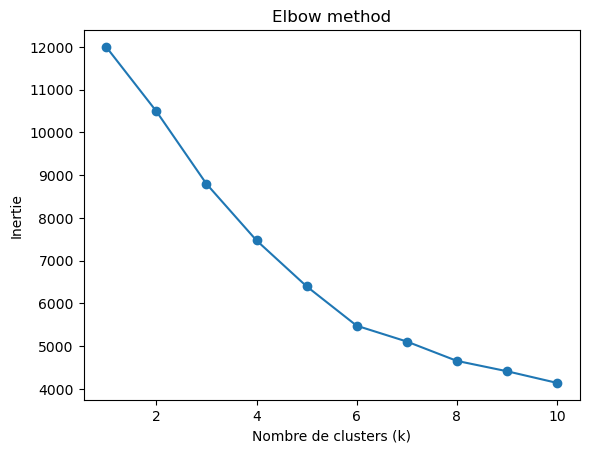

In [68]:
# elbow method to find optimal K value for k-means clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Elbow method')
plt.show()

In [69]:
#choosing the K found by the elbow method to start the Kmeans model fitting (clustering)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(features_scaled)

In [71]:
#Cluster analysis by features' means
cluster_means = df_clustering.groupby('cluster')[features].mean().reset_index()
print(cluster_means)

   cluster  speechiness  acousticness  instrumentalness  liveness   valence  \
0        0     0.097032      0.068572          0.002994  0.442864  0.608354   
1        1     0.070691      0.085120          0.005078  0.122517  0.738276   
2        2     0.068887      0.130950          0.662710  0.158313  0.511584   
3        3     0.063446      0.067331          0.008622  0.146067  0.348179   
4        4     0.077874      0.515671          0.001877  0.135020  0.435450   
5        5     0.298176      0.105201          0.002199  0.155121  0.576081   

        tempo  
0  124.974024  
1  114.294465  
2  123.820323  
3  125.229395  
4  112.987207  
5  123.557311  


In [74]:
#naming clusters
cluster_names = {
    0: "Happy Chill",
    1: "Feel Good/Acoustic",
    2: "Instrumental",
    3: "Sad/Emotional",
    4: "Chill Acoustic",
    5: "Spoken/Rap"
}

df_clustering['cluster_name'] = df_clustering['cluster'].map(cluster_names)


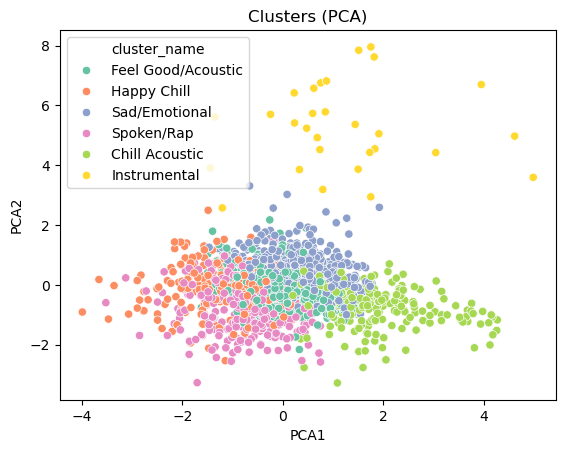

In [76]:
#Visualizing clusters with PCA using Seaborn Scatterplot
#using PCA, une methode lineaire qui projette les donnees dans un espace a dimensions plus faibles (reduction de dimentionnalite)
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)
df_clustering['PCA1'] = components[:, 0]
df_clustering['PCA2'] = components[:, 1]

sns.scatterplot(data=df_clustering, x='PCA1', y='PCA2', hue='cluster_name', palette='Set2')
plt.title("Clusters (PCA)")
plt.show()

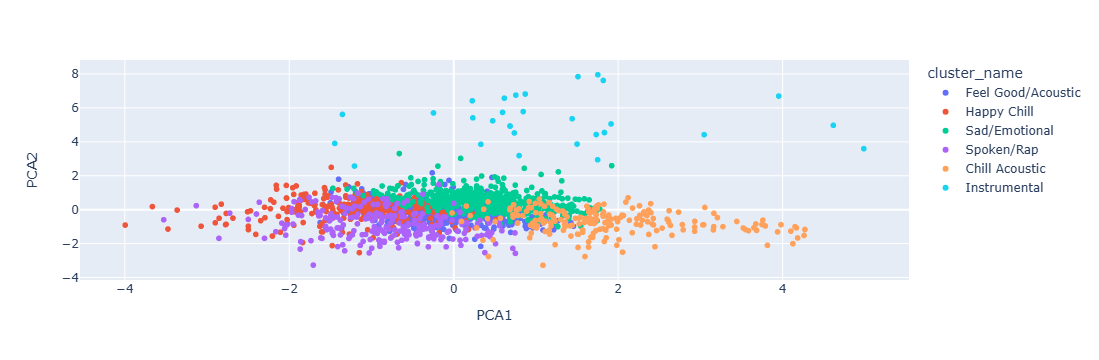

In [78]:
#interactive PCA visualization using Plotly
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) #i had to do this to ignore a warning that kept showing up no matter how i tried to fix it

fig = px.scatter(df_clustering, x='PCA1', y='PCA2', color='cluster_name', hover_data=['song', 'artist'])
fig.show()

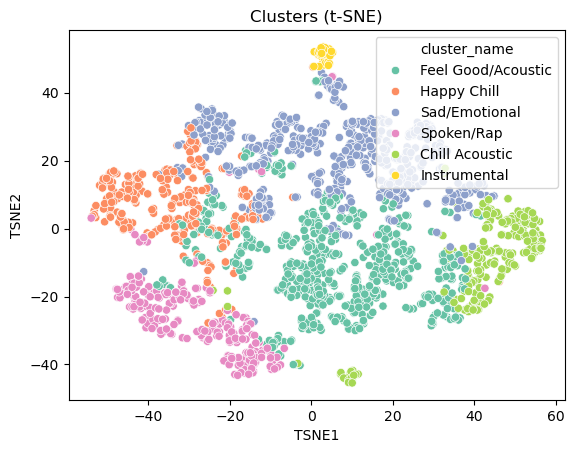

In [79]:
"""using TSNE, methode non-lineaire pour visualiser les donnees de haute dimension, il minimise une mesure de divergence pour que les points similaires 
selon la distance euclidienne restent proches dans l'espace reduit, donc il est meilleur pour les probleme de clustering """
#TSNE clustering visualisation using Scatter Plot
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)
df_clustering['TSNE1'] = tsne_results[:,0]
df_clustering['TSNE2'] = tsne_results[:,1]

sns.scatterplot(data=df_clustering, x='TSNE1', y='TSNE2', hue='cluster_name', palette='Set2')
plt.title("Clusters (t-SNE)")
plt.show()

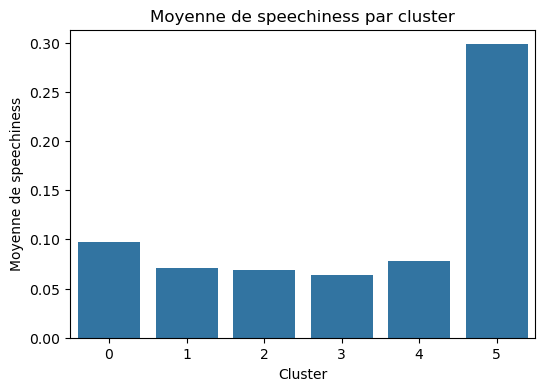

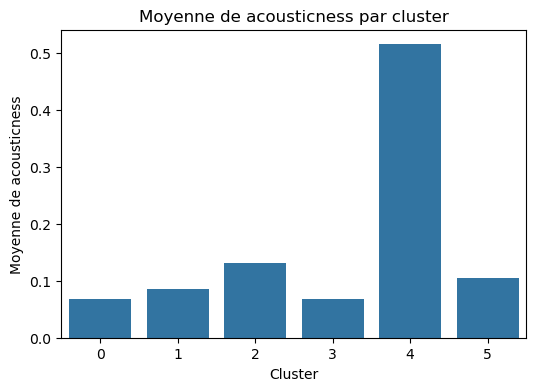

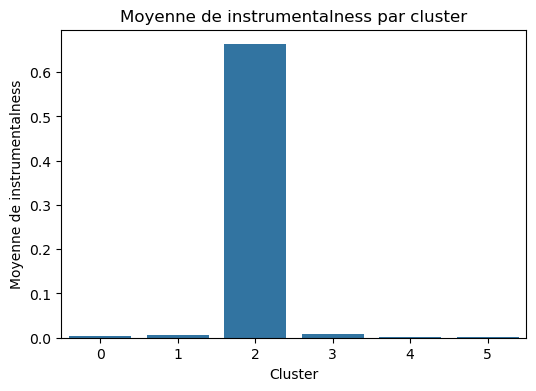

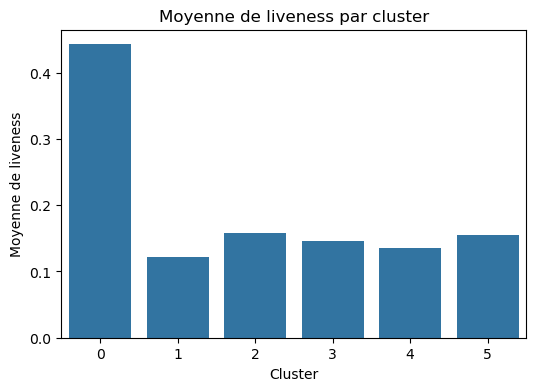

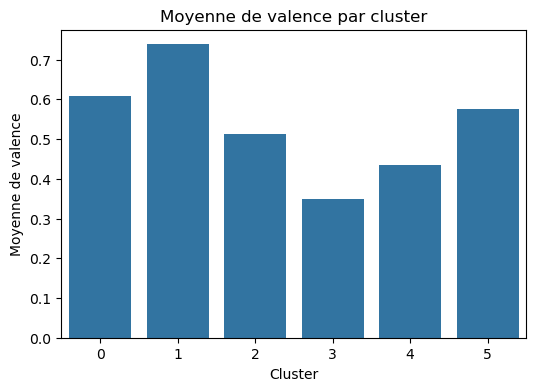

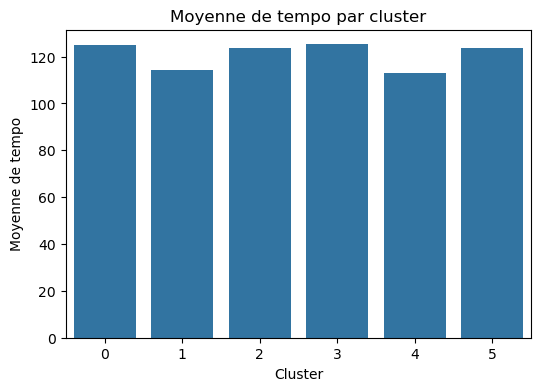

In [81]:
#feature mean visualisation by cluster with Bar Plots
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=cluster_means.index, y=cluster_means[feature])
    plt.title(f'Moyenne de {feature} par cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Moyenne de {feature}')
    plt.show()

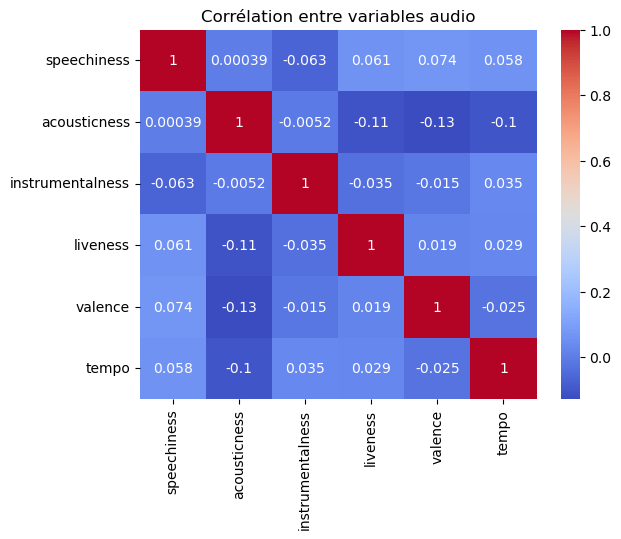

In [82]:
#correlation heatmap of audio features
sns.heatmap(df_clustering[features].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables audio")
plt.show()

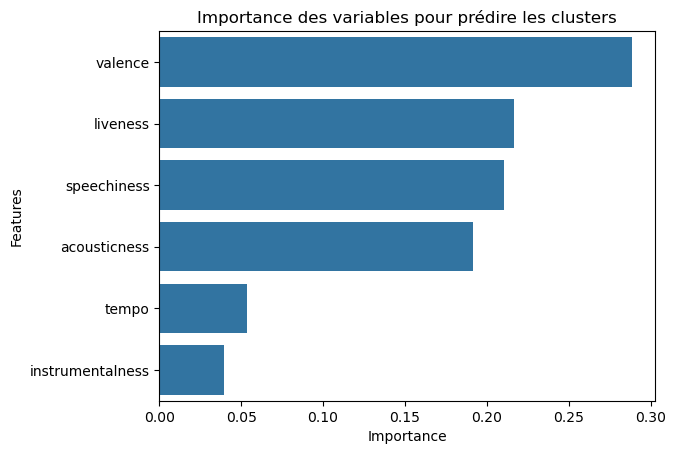

In [83]:
#feature importance in clustering with Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(features_scaled, df_clustering['cluster_name'])

importances = clf.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Importance des variables pour prédire les clusters")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()